### ** Richard Wambede Reg No: J25M19/005:**
# DATA ANALYSIS AND VISUALISATION EXAM, TRINITY 2025 
Please Note: ALL files and Script including all .csv files must be in one Folder
## Part A: Compulsory Question 1   
 
**I chose story path (b): Sector allocation analysis for Uganda's 2025/2026 National Budget.**

 

- This has been designed to drive data informed decisions on a critical issue to promote equitable resource allocation.
Below is data storytelling, forecasting,  analysis and dashboard for Uganda’s 2025/2026 National Budget.
The dataset is uploaded on Gitub with LINK in the report (pdf) includes:
Sectoral allocations (UGX Trillions) from 2020 to 2025, Total budget values, Computed percentage shares of each sector, GDP figures and Budget efficiency ratios (sector allocation as % of GDP)



In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [3]:
# Load dataset
df = pd.read_csv("uganda_budget_sector_allocations.csv")
df["GDP"] = [135.0, 140.0, 145.5, 151.0, 160.0, 170.0]  # Simulated GDP data
df.head()

Year  Human_Capital_Development  Governance_and_Security  \
0  2020                        6.2                      4.8   
1  2021                        6.5                      5.0   
2  2022                        7.1                      5.3   
3  2023                        7.8                      5.6   
4  2024                        8.4                      6.0   

   Infrastructure_Development  Agro_Industrialisation  Total_Budget    GDP  
0                         9.0                     3.1          47.5  135.0  
1                         9.8                     3.3          51.0  140.0  
2                        10.2                     3.5          55.0  145.5  
3                        10.5                     3.7          59.0  151.0  
4                        11.3                     3.9          66.2  160.0

In [4]:
# Melt for long format visualizations
df_melted = df.melt(id_vars=["Year"], 
                    value_vars=["Human_Capital_Development", "Governance_and_Security", 
                                "Infrastructure_Development", "Agro_Industrialisation"],
                    var_name="Sector", 
                    value_name="Allocation")
df_melted["Year"] = df_melted["Year"].astype(str)

In [5]:
fig = px.line(df_melted, x="Year", y="Allocation", color="Sector",
               title="Uganda Budget Allocation Trends by Sector (2020–2025)",
               markers=True)
fig.show()

In [6]:
for col in ["Human_Capital_Development", "Governance_and_Security", 
            "Infrastructure_Development", "Agro_Industrialisation"]:
    df[col + "_Pct"] = (df[col] / df["Total_Budget"]) * 100

df_percent_long = df.melt(id_vars=["Year"], 
                          value_vars=[c for c in df.columns if "_Pct" in c],
                          var_name="Sector", 
                          value_name="Share_Percent")
df_percent_long["Sector"] = df_percent_long["Sector"].str.replace("_Pct", "").str.replace("_", " ")
px.area(df_percent_long, x="Year", y="Share_Percent", color="Sector",
        title="Sectoral Share of Budget", groupnorm="percent").show()

In [7]:
def forecast_sector(df, sector_name, degree=2):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    X = df["Year"].values.reshape(-1, 1)
    y = df[sector_name].values
    model.fit(X, y)
    return model.predict(np.array(range(2020, 2031)).reshape(-1, 1))

forecast_df = pd.DataFrame({
    "Year": list(range(2020, 2031)),
    "Infrastructure_Development": forecast_sector(df, "Infrastructure_Development"),
    "Human_Capital_Development": forecast_sector(df, "Human_Capital_Development")
})
forecast_melted = forecast_df.melt(id_vars="Year", var_name="Sector", value_name="Forecast_Allocation")
px.line(forecast_melted, x="Year", y="Forecast_Allocation", color="Sector",
        title="Forecasted Allocations (2020–2030)").show()

In [8]:
# Budget Efficiency (Sector Allocation as % of GDP)
for sector in ["Human_Capital_Development", "Governance_and_Security", 
               "Infrastructure_Development", "Agro_Industrialisation"]:
    df[f"{sector}_Efficiency"] = df[sector] / df["GDP"]

# CAGR
def calculate_cagr(start_val, end_val, years):
    return ((end_val / start_val) ** (1 / years)) - 1

for sector in ["Human_Capital_Development", "Governance_and_Security", 
               "Infrastructure_Development", "Agro_Industrialisation"]:
    cagr = calculate_cagr(df[sector].iloc[0], df[sector].iloc[-1], 5) * 100
    print(f"{sector} CAGR (2020–2025): {cagr:.2f}%")

Human_Capital_Development CAGR (2020–2025): 8.21%
Governance_and_Security CAGR (2020–2025): 5.59%
Infrastructure_Development CAGR (2020–2025): 5.92%
Agro_Industrialisation CAGR (2020–2025): 6.26%


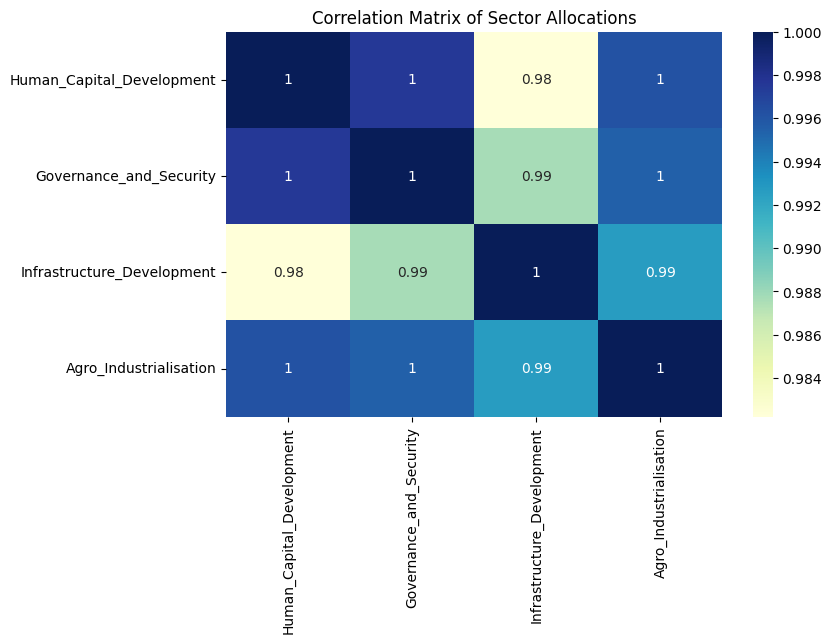

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.heatmap(df[["Human_Capital_Development", "Governance_and_Security", 
                "Infrastructure_Development", "Agro_Industrialisation"]].corr(), 
            annot=True, cmap="YlGnBu")
plt.title("Correlation Matrix of Sector Allocations")
plt.show()

### Export Instructions
To export this analysis:
- Use `File > Download as > Notebook (.ipynb)`
- Or click `Export as PDF` in your Jupyter environment

# Part B: Question 2   

 # Uganda CPI & Rainfall Forecasting System (Prophet + VAR)
**This system includes:**
- - Time Series Simulation
- - Granger Causality & VAR Forecasting
- - Prophet Forecasting (Now Active)
- - Forecast Plots
- - Expoert Analysis Data generated
- - Streamlit App Code Block

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.api import VAR
from prophet import Prophet
import sys
sys.executable

'c:\\Users\\richard\\AppData\\Local\\Programs\\Python\\Python313\\python.exe'

In [2]:
# Simulate Uganda time series data
np.random.seed(42)
dates = pd.date_range(start="2000-01-01", end="2024-12-01", freq="MS")
rainfall = np.random.normal(loc=100, scale=30, size=len(dates)) + np.sin(np.arange(len(dates)) / 12 * 2 * np.pi) * 25
cpi = 5 + np.cumsum(np.random.normal(0.2, 0.5, len(dates)))

uganda_df = pd.DataFrame({"date": dates, "rainfall_mm": rainfall, "cpi_percent": cpi})
uganda_df["date"] = pd.to_datetime(uganda_df["date"])
uganda_df.set_index("date", inplace=True)
uganda_df.head()

rainfall_mm  cpi_percent
date                                
2000-01-01   114.901425     4.785502
2000-02-01   108.352071     4.705412
2000-03-01   141.081291     5.279059
2000-04-01   170.690896     5.784244
2000-05-01   114.626034     5.973793

In [3]:
# Granger Causality Test
granger_data = pd.concat([uganda_df["cpi_percent"], uganda_df["rainfall_mm"]], axis=1).dropna()
granger_data.columns = ["CPI", "Rainfall"]
grangercausalitytests(granger_data, maxlag=12)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.7094  , p=0.0308  , df_denom=296, df_num=1
ssr based chi2 test:   chi2=4.7571  , p=0.0292  , df=1
likelihood ratio test: chi2=4.7197  , p=0.0298  , df=1
parameter F test:         F=4.7094  , p=0.0308  , df_denom=296, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.3382  , p=0.0369  , df_denom=293, df_num=2
ssr based chi2 test:   chi2=6.7904  , p=0.0335  , df=2
likelihood ratio test: chi2=6.7141  , p=0.0348  , df=2
parameter F test:         F=3.3382  , p=0.0369  , df_denom=293, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.2398  , p=0.0225  , df_denom=290, df_num=3
ssr based chi2 test:   chi2=9.9539  , p=0.0190  , df=3
likelihood ratio test: chi2=9.7907  , p=0.0204  , df=3
parameter F test:         F=3.2398  , p=0.0225  , df_denom=290, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.7225  , p=0.0298  

{np.int64(1): ({'ssr_ftest': (np.float64(4.709409786269238),
    np.float64(0.030793045762274082),
    np.float64(296.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(4.757140290859804),
    np.float64(0.029176985765052208),
    np.int64(1)),
   'lrtest': (np.float64(4.719693507337581),
    np.float64(0.029819057666154638),
    np.int64(1)),
   'params_ftest': (np.float64(4.7094097862686315),
    np.float64(0.030793045762285094),
    np.float64(296.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(3.3382101328610663),
    np.float64(0.03685568982402913),
    np.float64(293.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(6.790352352167903),
    np.float64(0.03353464564914653),
    np.int64(2)),
   'lrtest': (np.float64(6.714143956635212),
    np.float64(0.0348371135795927),
    np.int64(2)),
   'params_ftest': (np.float64(3.3382101328613834),
    np.float64(0.03685568982401808),
    np.float64(293.0),
    2.0)},
   array([[0., 0., 1., 0., 0.],


In [4]:
# VAR Forecast
var_model = VAR(granger_data)
var_result = var_model.fit(4)
forecast_values = var_result.forecast(granger_data.values[-4:], steps=12)
forecast_df = pd.DataFrame(forecast_values, columns=["CPI", "Rainfall"])
forecast_df["date"] = pd.date_range(start=uganda_df.index[-1] + pd.Timedelta(days=30), periods=12, freq='MS')
forecast_df.set_index("date", inplace=True)
forecast_df.head()


c:\Users\richard\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


CPI    Rainfall
date                             
2025-01-01  61.868480  103.568875
2025-02-01  61.974634  106.441503
2025-03-01  62.102741  103.730832
2025-04-01  62.203836  102.803213
2025-05-01  62.311352  103.011404

In [5]:
# Plot VAR Forecast
fig = go.Figure()
fig.add_trace(go.Scatter(x=uganda_df.index, y=uganda_df["cpi_percent"], name='Historical CPI', line=dict(color='black')))
fig.add_trace(go.Scatter(x=forecast_df.index, y=forecast_df["CPI"], name='Forecast CPI', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=uganda_df.index, y=uganda_df["rainfall_mm"], name='Historical Rainfall', line=dict(color='green')))
fig.add_trace(go.Scatter(x=forecast_df.index, y=forecast_df["Rainfall"], name='Forecast Rainfall', line=dict(color='orange')))
fig.update_layout(title="VAR Forecast: CPI and Rainfall", xaxis_title="Date", yaxis_title="Value")
fig.show()

12:19:54 - cmdstanpy - INFO - Chain [1] start processing
12:19:55 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\richard\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



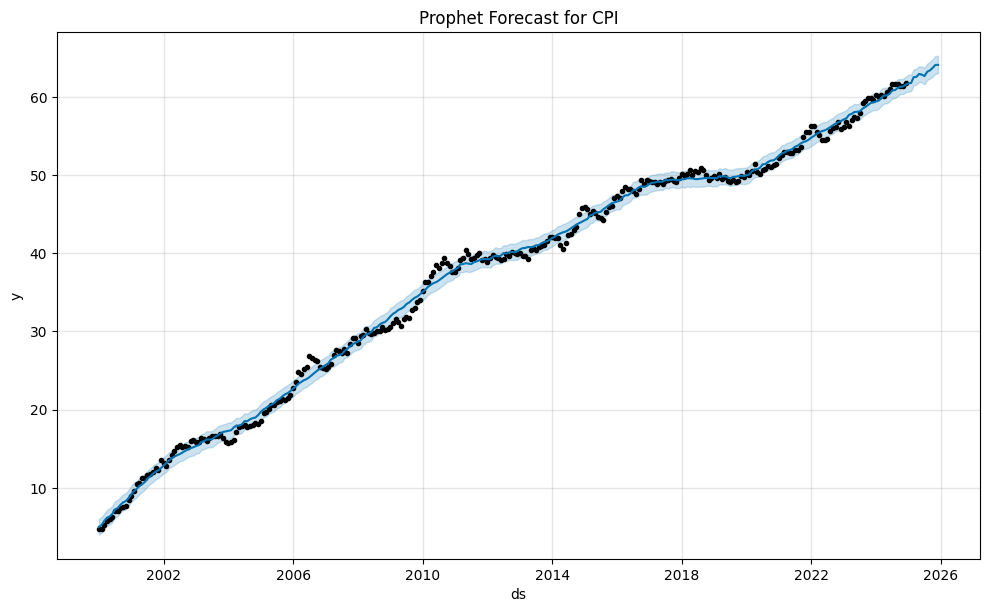

In [6]:
# Prophet Forecast
df_prophet = uganda_df.reset_index()[["date", "cpi_percent"]]
df_prophet.columns = ["ds", "y"]

prophet_model = Prophet(yearly_seasonality=True)
prophet_model.fit(df_prophet)

future = prophet_model.make_future_dataframe(periods=12, freq='M')
forecast_prophet = prophet_model.predict(future)

fig2 = prophet_model.plot(forecast_prophet)
plt.title("Prophet Forecast for CPI")
plt.show()

In [ ]:
# Export Data. Run this Code to download the File
uganda_df.to_csv("uganda_cpi_rainfall_timeseries.csv")
forecast_df.to_csv("uganda_cpi_forecast_var.csv")
forecast_prophet.to_csv("uganda_cpi_forecast_prophet.csv")

In [8]:
# STREAMLIT DASHBOARD CODE (Save as .py)
streamlit_code = """<Insert Streamlit Code from Final Dashboard>"""
with open("uganda_forecast_dashboard.py", "w", encoding="utf-8") as f:
    f.write(streamlit_code)
print("✅ Streamlit app code exported.")


✅ Streamlit app code exported.


# Part B: Question 5   

 # Child Mortality Dashboard with Real District Maps (Uganda, Kenya, Nigeria)
**This dashboard integrates:**
- - Trendlines by filters (country, district, gender, residence)
- - District-level choropleth maps using real GIS data (GeoJSON)
- - Export to PDF


In [9]:
%pip install voila ipywidgets pandas numpy plotly geopandas scikit-learn matplotlib fpdf

Note: you may need to restart the kernel to use updated packages.


In [1]:
%pip install pandas numpy plotly ipywidgets fpdf scikit-learn geopandas matplotlib shapely

  Using cached fpdf-1.7.2-py2.py3-none-any.whl
  Using cached geopandas-1.1.1-py3-none-any.whl.metadata (2.3 kB)
Using cached geopandas-1.1.1-py3-none-any.whl (338 kB)
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.7 MB ? eta -:--:--
   ------------------------------ --------- 1.3/1.7 MB 5.0 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 4.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/19.2 MB ? eta -:--:--
   -- ------------------------------------- 1.3/19.2 MB 6.3 MB/s eta 0:00:03
   ----- ---------------------------------- 2.6/19.2 MB 6.3 MB/s eta 0:00:03
   -------- ------------------------------- 3.9/19.2 MB 6.2 MB/s eta 0:00:03
   ---------- ----------------------------- 5.2/19.2 MB 6.3 MB/s eta 0:00:03
   ------------- -------------------------- 6.6/19.2 MB 6.3 MB/s eta 0:00:03
   ---------------- ----------------------- 7.9/19.2 MB 6.3 MB/s eta 0:00:02
   -------

In [2]:
import pandas as pd
import geopandas as gpd
import plotly.express as px
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display, clear_output
from sklearn.linear_model import LinearRegression
from fpdf import FPDF
import datetime
 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
 
from ipywidgets import interact, widgets
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Cleaned_Child_Mortality_With_Seasonality.csv')
features = ['Healthcare_Access_Index', 'Conflict_Exposure', 'Maternal_Education_Years']
target = 'U5_Mortality_Rate'

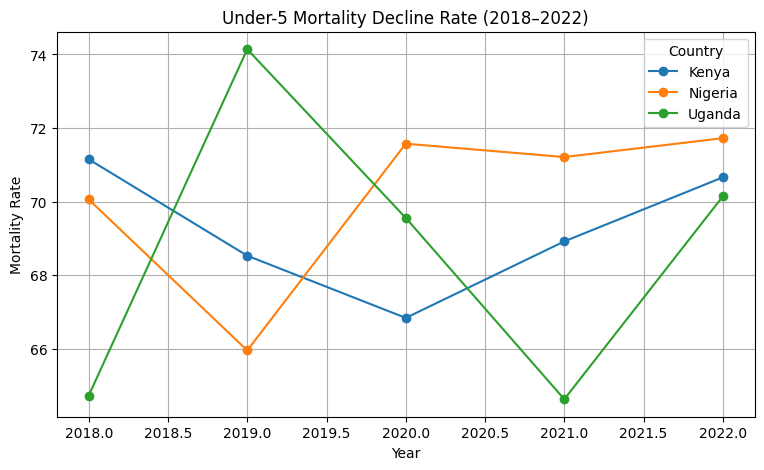

In [4]:
def plot_mortality_decline():
    decline_df = df.groupby(['Country', 'Year'])['U5_Mortality_Rate'].mean().reset_index()
    pivot_decline = decline_df.pivot(index='Year', columns='Country', values='U5_Mortality_Rate')
    pivot_decline.plot(figsize=(9,5), marker='o', title='Under-5 Mortality Decline Rate (2018–2022)')
    plt.ylabel('Mortality Rate')
    plt.grid(True)
    plt.show()

plot_mortality_decline()

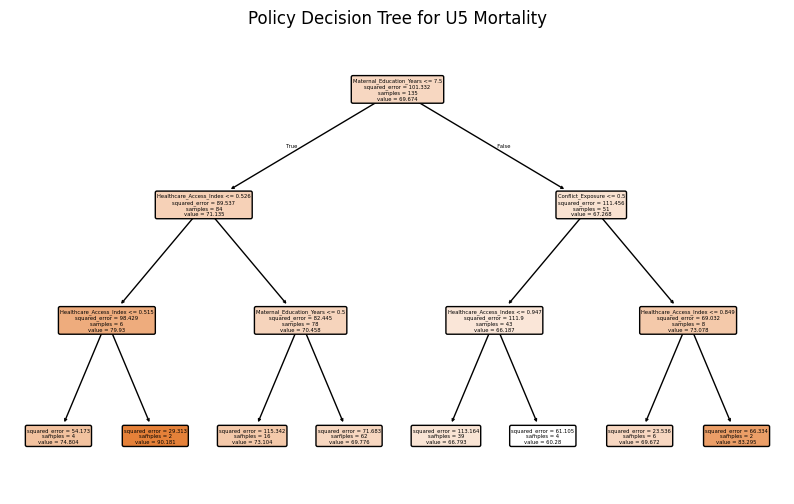

In [5]:
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
tree_model = DecisionTreeRegressor(max_depth=3)
tree_model.fit(X_train, y_train)

def show_decision_tree():
    plt.figure(figsize=(10, 6))
    plot_tree(tree_model, feature_names=features, filled=True, rounded=True)
    plt.title("Policy Decision Tree for U5 Mortality")
    plt.show()

show_decision_tree()

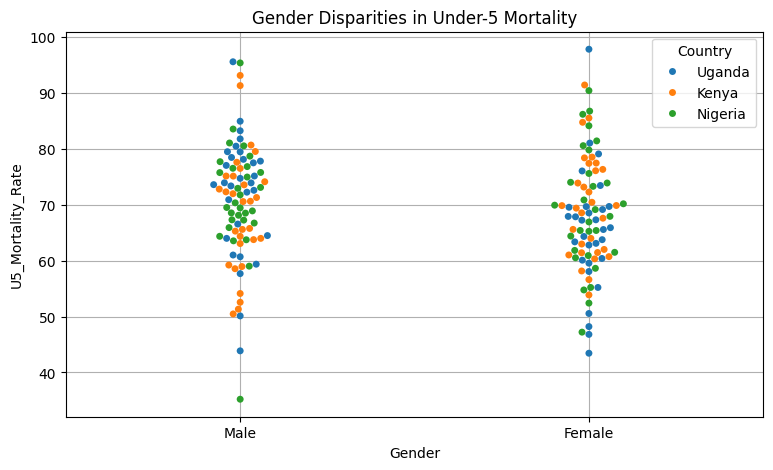

In [6]:
def gender_disparity_plot():
    plt.figure(figsize=(9, 5))
    sns.swarmplot(data=df, x='Gender', y='U5_Mortality_Rate', hue='Country')
    plt.title("Gender Disparities in Under-5 Mortality")
    plt.grid(True)
    plt.show()

gender_disparity_plot()

In [7]:
df['Predicted_Mortality'] = tree_model.predict(df[features])
hotspots = df.groupby(['Country', 'District'])['Predicted_Mortality'].mean().reset_index()
hotspots = hotspots.sort_values(by='Predicted_Mortality', ascending=False).head(10)
hotspots.style.background_gradient(cmap='Reds')

In [8]:
# Load data
df = pd.read_csv("Cleaned_Child_Mortality_Data.csv")
df['District'] = df['District'].fillna('Central')
df['Gender'] = df.get('Gender', pd.Series(['Male'] * len(df)))
df['Residence'] = df.get('Residence', pd.Series(['Urban'] * len(df)))
df['Mortality_Change_Rate'] = df.groupby(['Country', 'District'])['U5_Mortality_Rate'].pct_change().fillna(0) * 100

# Load geojsons (ensure these files are in the same directory)
gdfs = {
    "Uganda": gpd.read_file("UGA_adm2.geojson"),
    "Kenya": gpd.read_file("KEN_adm2.geojson"),
    "Nigeria": gpd.read_file("NGA_adm2.geojson")
}


In [9]:
country_dropdown = widgets.Dropdown(options=sorted(df['Country'].unique()), description='Country:')
district_dropdown = widgets.Dropdown(options=sorted(df['District'].unique()), description='District:')
gender_dropdown = widgets.Dropdown(options=['Male', 'Female'], description='Gender:')
residence_dropdown = widgets.Dropdown(options=['Urban', 'Rural'], description='Residence:')
pdf_button = widgets.Button(description="Export PDF")
output = widgets.Output()

In [10]:

def update_dashboard(change):
    with output:
        clear_output(wait=True)
        country = country_dropdown.value
        district = district_dropdown.value
        gender = gender_dropdown.value
        residence = residence_dropdown.value

        filtered = df[
            (df['Country'] == country) &
            (df['District'] == district) &
            (df['Gender'] == gender) &
            (df['Residence'] == residence)
        ]

        if filtered.empty:
            print("⚠️ No data for this selection.")
            return

        # Trendline Plot
        fig = px.line(filtered, x='Year', y='U5_Mortality_Rate',
                      title=f"{country} | {district} | {gender}, {residence}")
        try:
            fig.write_image("trend_plot.png")
        except Exception as e:
            print("⚠️ Kaleido export failed. Install with `pip install -U kaleido`")
            print(str(e))
        fig.show()

        # KPIs
        latest = filtered[filtered['Year'] == filtered['Year'].max()].iloc[0]
        print(f"📍 {country} - {district} ({gender}, {residence}) in {latest['Year']}")
        print(f"Mortality Rate: {latest['U5_Mortality_Rate']:.1f}")
        print(f"Healthcare Access Index: {latest['Healthcare_Access_Index']}")
        print(f"Disease Prevalence Index: {latest['Disease_Prevalence_Index']}")

        # Choropleth Section
        geo = gdfs[country]
        geo_cols = geo.columns.str.lower()
        match_col = None
        for col in geo.columns:
            if col.lower() in ['name_2', 'district', 'county', 'lga', 'adm2_en']:
                match_col = col
                break

        if match_col is None:
            raise ValueError(f"⚠️ Could not find a suitable district column in GeoJSON for {country}")

        filtered_latest = df[
            (df['Country'] == country) &
            (df['Year'] == df['Year'].max())
        ]

        merged = geo.merge(
            filtered_latest[['District', 'U5_Mortality_Rate']],
            left_on=match_col,
            right_on='District',
            how='left'
        )

        fig_map = px.choropleth_mapbox(
            merged,
            geojson=merged.geometry,
            locations=merged.index,
            color='U5_Mortality_Rate',
            mapbox_style='carto-positron',
            zoom=5,
            center={"lat": merged.geometry.centroid.y.mean(), "lon": merged.geometry.centroid.x.mean()},
            opacity=0.5,
            title=f"District-Level Child Mortality: {country} - {latest['Year']}"
        )
        fig_map.show()

In [11]:

def export_to_pdf(button):
    global export_pdf_data
    now = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
    pdf = FPDF()
    pdf.add_page()
    pdf.set_font("Arial", size=12)
    pdf.cell(200, 10, txt="Child Mortality Report", ln=True, align='C')
    for k, v in export_pdf_data.items():
        pdf.cell(200, 10, txt=f"{k.capitalize()}: {v}", ln=True)
    pdf.image("trend_plot.png", x=10, y=80, w=180)
    filename = f"Mortality_Report_{now}.pdf"
    pdf.output(filename)
    print(f"✅ PDF saved as: {filename}")

pdf_button.on_click(export_to_pdf)

In [12]:
country_dropdown.observe(update_dashboard, names='value')
district_dropdown.observe(update_dashboard, names='value')
gender_dropdown.observe(update_dashboard, names='value')
residence_dropdown.observe(update_dashboard, names='value')

display(widgets.HBox([country_dropdown, district_dropdown]))
display(widgets.HBox([gender_dropdown, residence_dropdown]))
display(pdf_button)
display(output)

update_dashboard(None)

Button(description='Export PDF', style=ButtonStyle())

Output()

# Part B: Question 6   

 # Exploring and forecasting school dropout risk in Sub-saharan Africa
**This dashboard integrates:**
- - Trendlines by filters (country, district, gender, residence)
- - Dropout by Gender and Country


In [13]:
%pip install pandas numpy matplotlib seaborn scikit-learn shap ipywidgets plotly

Note: you may need to restart the kernel to use updated packages.


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       146
           1       0.82      0.64      0.72        22

    accuracy                           0.93       168
   macro avg       0.89      0.81      0.84       168
weighted avg       0.93      0.93      0.93       168



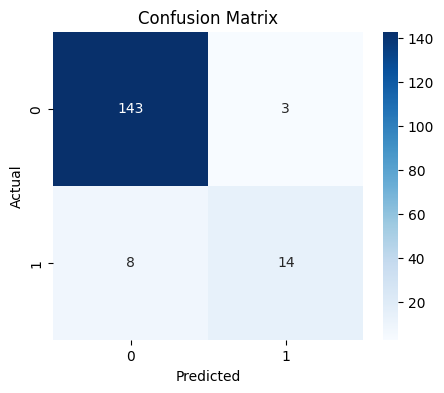

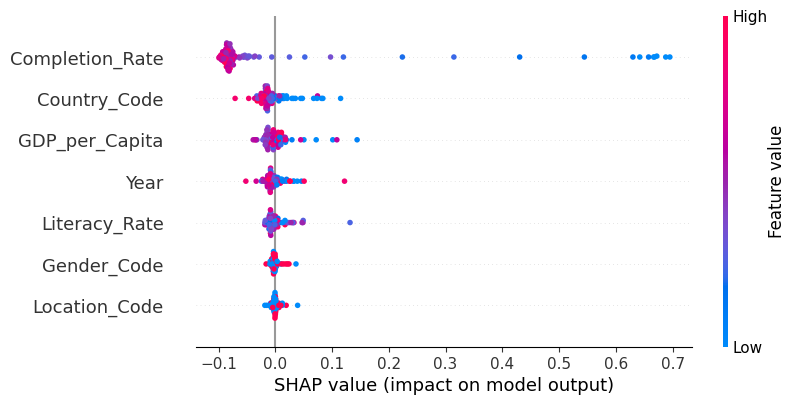

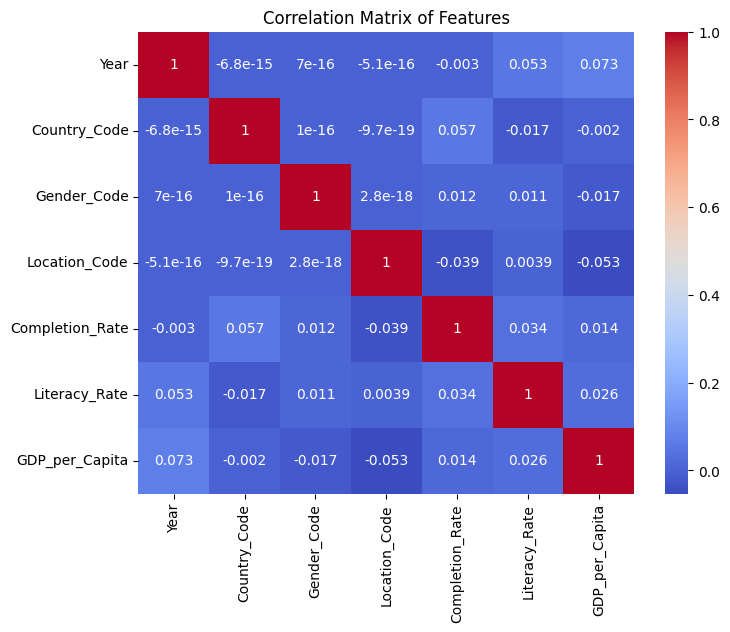

Dropdown(description='Country', options=('Uganda', 'Kenya', 'Tanzania', 'Nigeria', 'Ethiopia', 'Ghana', 'Zambi…

Dropdown(description='Gender', options=('Male', 'Female'), value='Male')

interactive(children=(Dropdown(description='Country', options=('Uganda', 'Kenya', 'Tanzania', 'Nigeria', 'Ethi…

<function __main__.dashboard(country, gender)>

In [14]:

# ✅  Dropout Analysis 
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import ipywidgets as widgets
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("subsaharan_dropout_cleaned.csv")

# Encode categoricals
df['Country_Code'] = LabelEncoder().fit_transform(df['Country'])
df['Gender_Code'] = LabelEncoder().fit_transform(df['Gender'])
df['Location_Code'] = LabelEncoder().fit_transform(df['Location'])

# Define binary target
df['High_Dropout_Risk'] = (df['Dropout_Rate'] > 35).astype(int)

features = ['Year', 'Country_Code', 'Gender_Code', 'Location_Code',
            'Completion_Rate', 'Literacy_Rate', 'GDP_per_Capita']
X = df[features]
y = df['High_Dropout_Risk']

# Train model
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
df['Dropout_Prediction'] = rf_model.predict(X)

# Classification results
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ✅ FIXED SHAP BEESWARM FOR BINARY CLASS
explainer = shap.Explainer(rf_model, X_train)
shap_values = explainer(X_train[:100])  # use only 100 samples for performance
shap.plots.beeswarm(shap_values[:, :, 1])  # Class 1: High Dropout Risk

# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Features")
plt.show()

# Gender Dropout Gap Over Time
gender_gap = df.groupby(['Year', 'Country'])['Dropout_Rate'].apply(
    lambda x: x.iloc[0] - x.iloc[1] if len(x) > 1 else 0).reset_index(name='Gender_Dropout_Gap')
fig_gap = px.line(gender_gap, x='Year', y='Gender_Dropout_Gap', color='Country',
                  title="Gender Dropout Gap Over Time")
fig_gap.show()

# Forecast (Linear Regression)
forecast_df = df.groupby('Year')['Dropout_Rate'].mean().reset_index()
lr_model = LinearRegression().fit(forecast_df[['Year']], forecast_df['Dropout_Rate'])
forecast_df['Forecast'] = lr_model.predict(forecast_df[['Year']])
fig_forecast = px.line(forecast_df, x='Year', y=['Dropout_Rate', 'Forecast'],
                       title='📈 Dropout Forecast vs Actual')
fig_forecast.show()

# Dashboard Function
def dashboard(country, gender):
    subset = df[(df['Country'] == country) & (df['Gender'] == gender)]
    print(f"📌 KPIs - {country} ({gender})")
    print(f"Avg Dropout Rate: {subset['Dropout_Rate'].mean():.2f}%")
    print(f"Avg Literacy Rate: {subset['Literacy_Rate'].mean():.2f}%")
    print(f"Avg GDP per Capita: ${subset['GDP_per_Capita'].mean():,.0f}")

    # Trend Line
    trend = subset.groupby('Year')['Dropout_Rate'].mean().reset_index()
    fig = px.line(trend, x='Year', y='Dropout_Rate', title='Dropout Rate Trend')
    fig.show()

    # Boxplot
    fig2 = px.box(df[df['Country'] == country], x='Gender', y='Dropout_Rate', title='Dropout by Gender')
    fig2.show()

    # Country-level Choropleth (latest year)
    year_map = df['Year'].max()
    map_df = df[df['Year'] == year_map].groupby('Country')['Dropout_Rate'].mean().reset_index()
    fig_map = px.choropleth(map_df, locations='Country', locationmode='country names',
                            color='Dropout_Rate', color_continuous_scale='Reds',
                            title=f'{year_map} Dropout Map')
    fig_map.show()

# Widgets
country_dropdown = widgets.Dropdown(options=df['Country'].unique(), description="Country")
gender_dropdown = widgets.Dropdown(options=df['Gender'].unique(), description="Gender")
display(country_dropdown, gender_dropdown)
widgets.interact(dashboard, country=country_dropdown, gender=gender_dropdown)